In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw

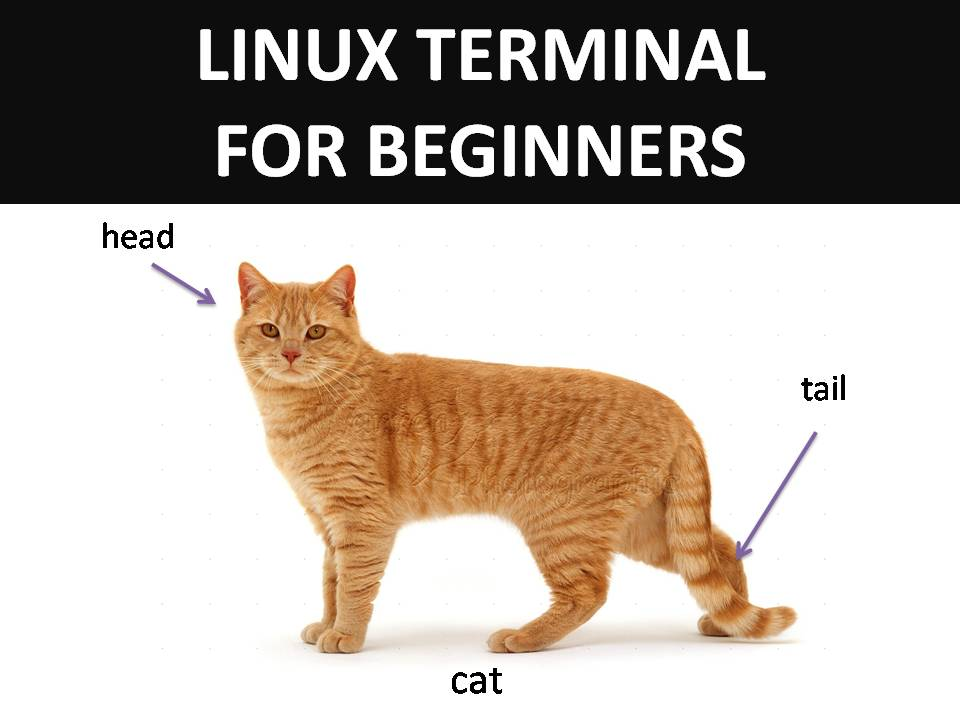

In [5]:
filename = 'c:/tail.jpg'
im = Image.open(filename)
im


In [9]:
print(type(im))

width, height = im.size
print(f'Width: {width}, Height: {height}')

pix = im.load()
print(type(pix))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Width: 960, Height: 720
<class 'PixelAccess'>


In [11]:
xc, yc = 300, 300
print(f'Pixel {xc} x {yc} brightness: {pix[xc, yc]}')

Pixel 300x300 brightness: (200, 131, 76)


In [24]:
rgb = np.asarray(im)
print(rgb.shape)

print('Pixel {0} x {1}: R: {2}, G: {3}, B: {4}'.format(xc, yc, rgb[xc,yc,0], rgb[xc,yc,1], rgb[xc,yc,2]))

print('Pixel {0} x {1}: R: {2}, G: {3}, B: {4}'.format(xc, yc, *(rgb[xc,yc,:])))

(720, 960, 3)
Pixel 300 x 300: R: 200, G: 131, B: 76
Pixel 300 x 300: R: 200, G: 131, B: 76


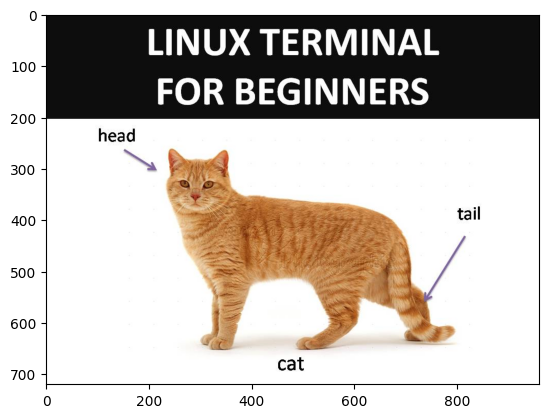

In [21]:
plt.imshow(rgb)
plt.show()

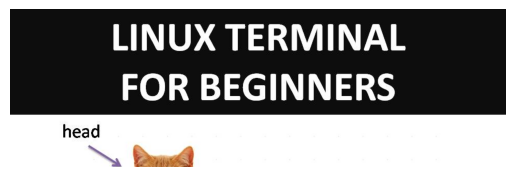

In [29]:
plt.axis("Off")
plt.imshow(rgb[0:305, :, :])
plt.show()

2073600 uint8
16588800 float64
8294400 float32
[[0.73333335 0.5294118  0.29411766]
 [0.7529412  0.5568628  0.31764707]
 [0.7411765  0.5372549  0.3137255 ]
 [0.7411765  0.5254902  0.30588236]
 [0.7254902  0.50980395 0.2901961 ]]


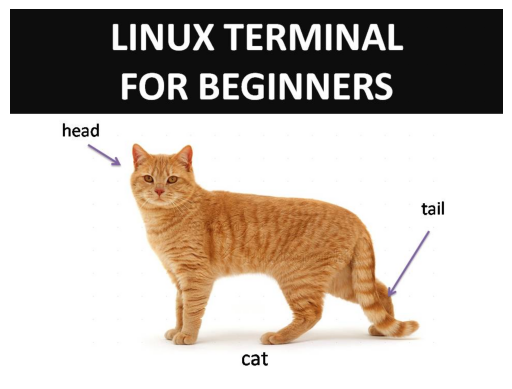

In [54]:
print(rgb.size * rgb.itemsize, rgb.dtype)

rgb_norm = rgb / 255
print(rgb_norm.size * rgb_norm.itemsize, rgb_norm.dtype)

rgb_norm = rgb_norm.astype('float32')
print(rgb_norm.size * rgb_norm.itemsize, rgb_norm.dtype)

print(rgb_norm[450, 590:595, :])

plt.axis("Off")
plt.imshow(rgb_norm)
plt.show()

-0.2999997307143321 0.2999999052873487
-0.29992776463074694 1.2999994971971258
0.0 1.0


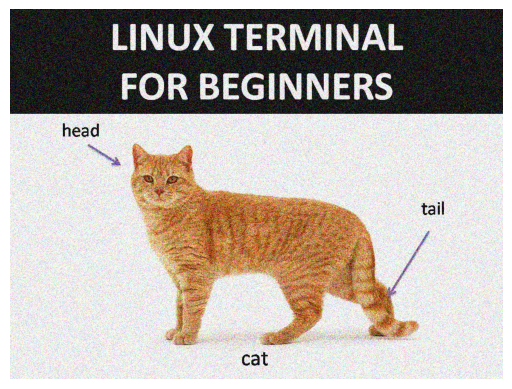

In [59]:
noise = np.random.random(size = rgb_norm.shape) * 0.6 - 0.3
print(noise.min(), noise.max())

rgb_noise = rgb_norm + noise
print(rgb_noise.min(), rgb_noise.max())

rgb_noise[rgb_noise < 0] = 0.0
rgb_noise[rgb_noise > 1] = 1.0
print(rgb_noise.min(), rgb_noise.max())

plt.axis("Off")
plt.imshow(rgb_noise)
plt.show()

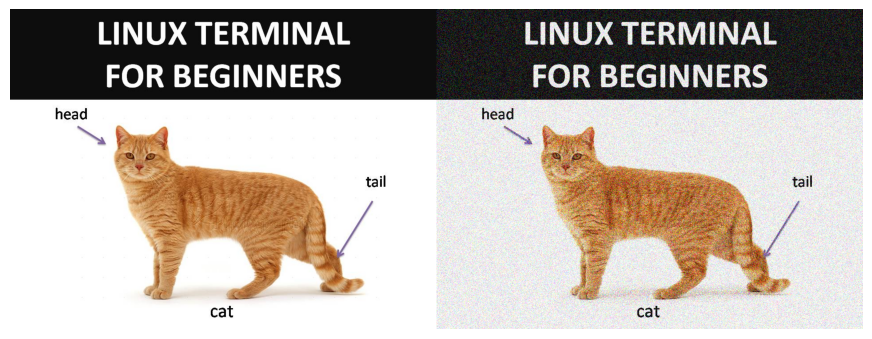

In [102]:
f, ax = plt.subplots(figsize=(11,5))
ax.axis("Off")
ax.imshow(np.concatenate([rgb_norm, rgb_noise], axis=1))
plt.show()

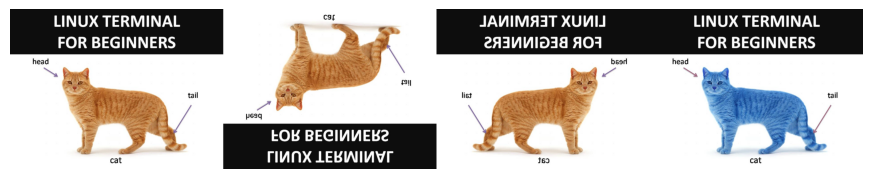

In [106]:
rgb_mirror = rgb[::-1]
rgb_mirror2 = rgb[:, ::-1]
rgb_mirror3 = rgb[:, :, ::-1]
f, ax = plt.subplots(figsize=(11,5))
ax.axis("Off")
ax.imshow(np.concatenate([rgb, rgb_mirror, rgb_mirror2, rgb_mirror3], axis=1))
plt.show()

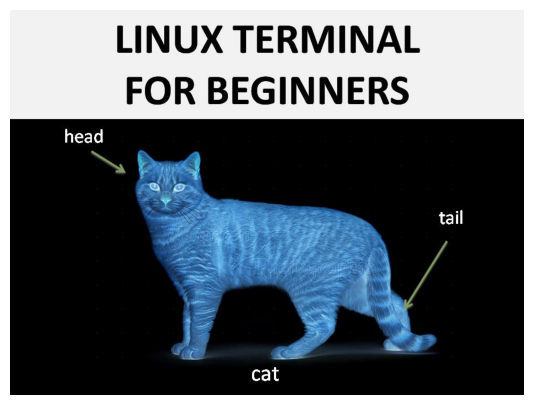

In [107]:
rgb_neg = 255 - rgb
f, ax = plt.subplots(figsize=(11,5))
ax.axis("Off")
ax.imshow(rgb_neg)
plt.show()

(40, 40, 3)


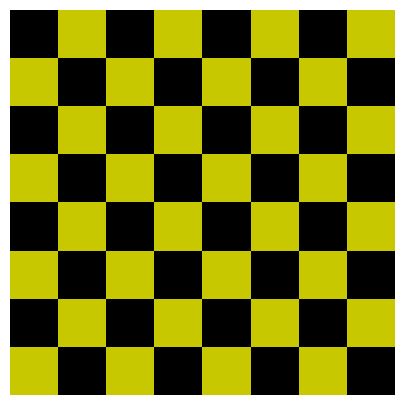

In [114]:
def board(num, size):
    white = np.array([255, 255, 255])
    yellow = np.array([200, 200, 0])
    rgb = np.zeros((size * num, size * num, 3), dtype=np.uint8)
    for i in range(num):
        for j in range(num):
            if (i + j) % 2:
                p1 = (i * size, j * size)
                p2 = ((i + 1) * size, (j + 1) * size)
                rgb[p1[0]:p2[0], p1[1]:p2[1]] = yellow
    return rgb

im = board(8, 5)
print(im.shape)

f, ax = plt.subplots(figsize=(11,5))
ax.axis("Off")
ax.imshow(im)
plt.show()

im2 = Image.fromarray(im)
im2.save('c:/chess.jpg')

In [118]:
im_tr = im.transpose(2, 0, 1)
print(im.shape, im_tr.shape)


(40, 40, 3) (3, 40, 40)


In [122]:
imbatch = np.concatenate([im_tr[np.newaxis, :, :, :], im_tr[np.newaxis, :, :, :]], axis=0)
print(imbatch.shape)

vectbatch = imbatch.reshape(imbatch.shape[0], -1)
print(vectbatch.shape)

imvect = im_tr.flatten()
print(im_tr.shape, imvect.shape)

(2, 3, 40, 40)
(2, 4800)
(3, 40, 40) (4800,)
